1. 

In [63]:
import os
import networkx as nx

In [64]:
os.chdir('/Users/[editted]/Documents/MA_cbg_human_mobility_2019')

In [65]:
import pandas as pd

In [66]:
ma_df = pd.read_csv('MA_cbg2cbg_2019_01.csv')
print(ma_df.columns)
print(ma_df.shape)
ma_df.head()

Index(['poi_cbg', 'year_month', 'raw_device_counts', 'visitor_census_tract',
       'visitor_count'],
      dtype='object')
(840593, 5)


,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250250303003,2019_1,19187,250250303003,413
1,250250303003,2019_1,19187,250251010016,182
2,250250303003,2019_1,19187,440070008003,122
3,250250303003,2019_1,19187,250250923002,121
4,250250303003,2019_1,19187,250173686001,112


In [67]:
G = nx.Graph()

In [68]:
for i in range(len(ma_df)):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)

In [69]:
print(nx.info(G))

Graph with 40292 nodes and 742299 edges


/var/folders/r8/83_dlqf14nn0b3855_ng_wsh0000gn/T/ipykernel_27051/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


There are 40292 nodes and 742299 edges. 

2. 

In [76]:
weighted_data = []
unweighted_data = []

In [77]:
for node in G.nodes(): 
    unweighted_data.append(G.degree(node))
    weighted_data.append(G.degree(node, weight = 'weight'))

In [78]:
mobility_df = pd.DataFrame(columns = ['ID','weighted','unweighted'])
mobility_df['ID'] = G.nodes()
mobility_df['weighted'] = weighted_data
mobility_df['unweighted'] = unweighted_data
mobility_df.to_csv('mobility_network.csv', index = False)

In [81]:
mobility_df = pd.read_csv('mobility_network.csv')
print(mobility_df.shape)
mobility_df

(40292, 3)


,ID,weighted,unweighted
0,250250303003,1.617298,2936
1,250251010016,1.829781,609
2,440070008003,0.201907,77
3,250250923002,2.675362,600
4,250173686001,1.763752,3217
...,...,...,...
40287,170318261003,0.000726,1
40288,120310144111,0.000726,1
40289,530330294073,0.000726,1
40290,360610165001,0.000726,1


3. 

In [84]:
weighted_df = mobility_df.drop(['unweighted'], axis=1)

In [85]:
from matplotlib import pyplot as plt
import numpy as np

(array([[    0.,     0.,     0.],
        [35617.,  4527.,   144.]]),
 array([0, 1, 2, 3]),
 <a list of 2 BarContainer objects>)

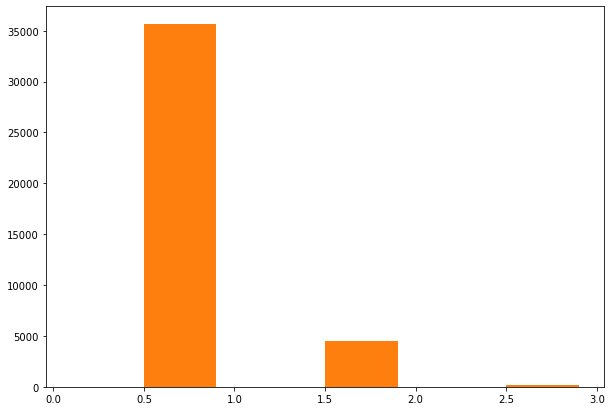

In [86]:
fig, weighted_dfh = plt.subplots(figsize =(10, 7))
weighted_dfh.hist(weighted_df, bins = [0,1,2,3])

YES